In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading data
dataset = load_dataset('lukebarousse/data_jobs', split='train')
df = dataset.to_pandas()

# Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/home/dawn/anaconda3/envs/DA_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


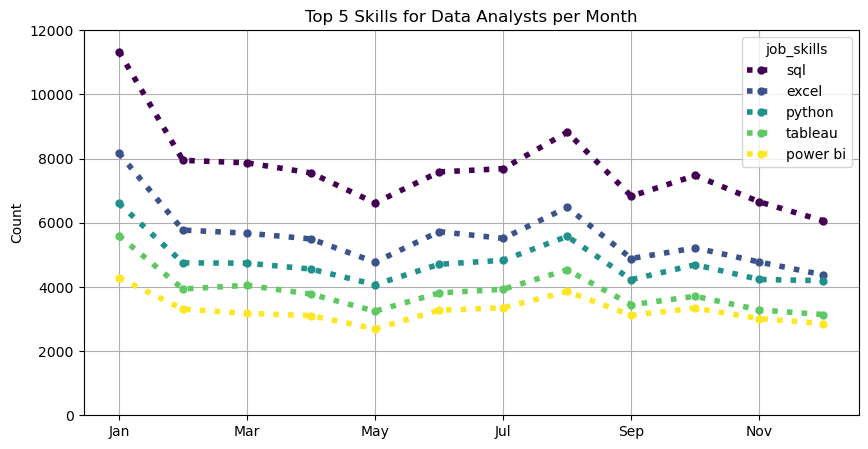

In [19]:
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# Explode the job_skills column and pivot
df_DA_explode= df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# Use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns='job_posted_month_no')

# Get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(
    kind='line',
    # BASIC CUSTOMIZATION
    linewidth=4,
    linestyle=':', # options: '-', '--', '-.', ':'
    colormap='viridis', # options: 'viridis', 'plasma', 'inferno', 'magma', 'cividis' 
    marker = 'o',
    markersize = 5,
    figsize=(10, 5)
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylim(0, 12000) # set limitation of y axis
plt.grid(True) # set the grid visible
plt.ylabel('Count')
plt.xlabel('')
plt.show()

Customizing our Scatter plot from 15_Scatter_Plot.ipynb

In [20]:
# Explode the 'job_skills' into individual rows
df_exploded = df_DA.explode('job_skills')

# Calculate the average salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

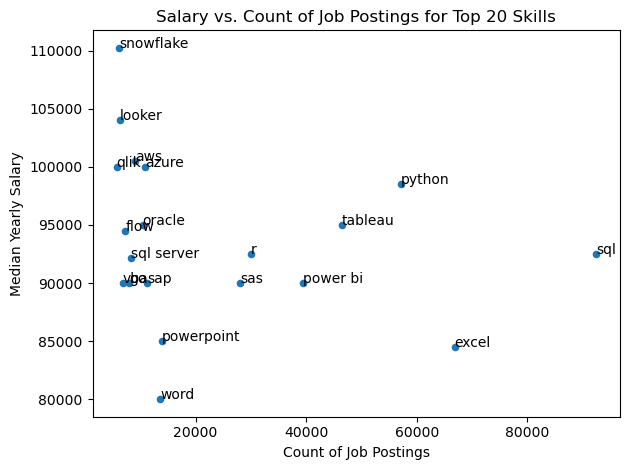

In [25]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()

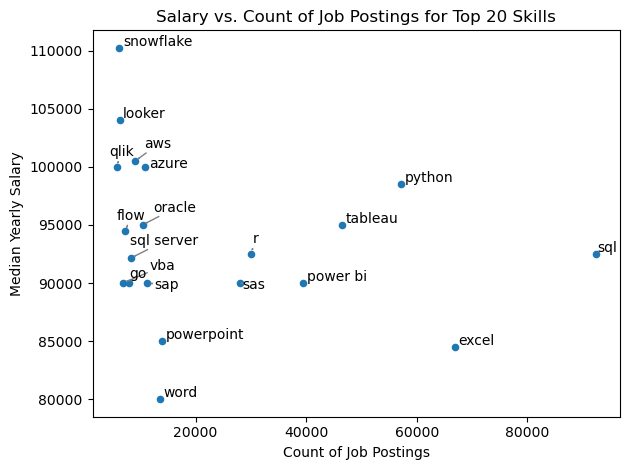

In [23]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')

# Prepare texts for adjustText
texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

# Adjust text to avoid overlap
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

# Set axis labels, title, and legend
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')

# Adjust layout and display plot 
plt.tight_layout()
plt.show()

Legend
Notes
legend(): Place a legend on the axes.
Common arguments:
loc - Specifies the legend's location on the plot. Values can be a string (e.g., 'upper right', 'lower left') or a tuple of coordinates.
bbox_to_anchor - A tuple (x, y) to place the legend at a specific position, relative to the axes. Used in conjunction with loc.
ncol - Number of columns in the legend (for when you have many items). Default is 1.
fontsize - The font size of the legend's text. Accepts numerical values or predefined strings like 'small', 'medium', 'large'.
title - The title of the legend. A string value.
title_fontsize - Font size for the legend’s title. Accepts numerical values or predefined strings.
frameon - Boolean. If True, a frame is drawn around the legend. Default is True.

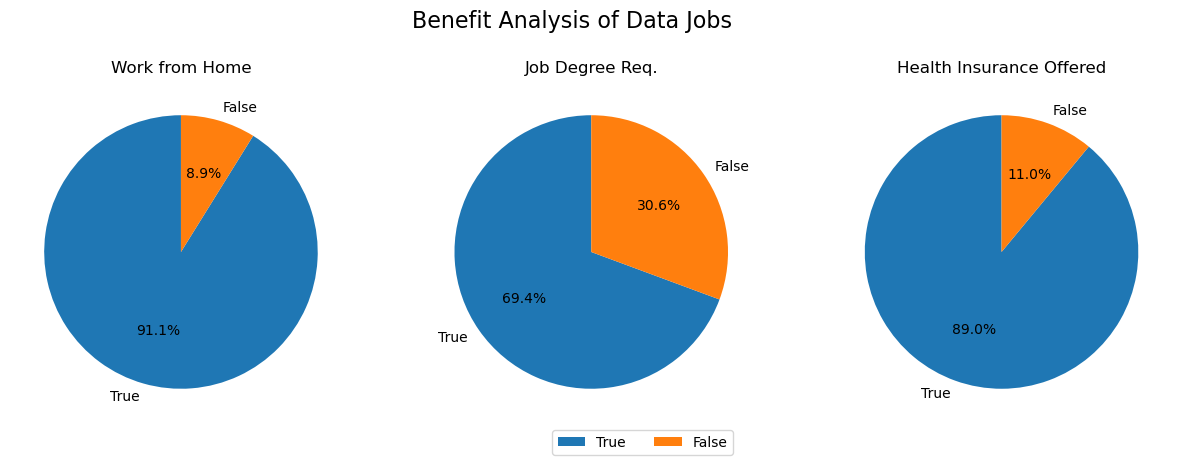

In [37]:
dict_column = {
    'job_work_from_home': 'Work from Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['True', 'False'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.legend(loc='upper center', ncols=2, bbox_to_anchor=(-0.55, 0))
plt.show()